In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle

from wrangle import wrangle_zillow
from wrangle import split


In [2]:
from scipy import stats
from math import sqrt


In [3]:
from wrangle import scale_data
from wrangle import seperate_y

In [4]:
df = wrangle_zillow()

In [5]:
df.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,tax_value,house_age
parcelid,,,,,,,
12177905,2376.0,4,3,6037,13038.0,145143.0,51
12069064,738.0,2,1,6037,4214.0,218552.0,99
12790562,3039.0,4,3,6037,20028.0,220583.0,51
11104527,2540.0,4,3,6037,10384.0,430108.0,22
11830315,1146.0,2,1,6037,4657.0,273745.0,82


In [6]:
df.shape

(44785, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44785 entries, 12177905 to 13083743
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   square_feet  44785 non-null  float64
 1   bedrooms     44785 non-null  int64  
 2   bathrooms    44785 non-null  int64  
 3   fips         44785 non-null  int64  
 4   lot_size     44785 non-null  float64
 5   tax_value    44785 non-null  float64
 6   house_age    44785 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.7 MB


In [8]:
df.describe()

,square_feet,bedrooms,bathrooms,fips,lot_size,tax_value,house_age
count,44785.000000,44785.000000,44785.000000,44785.000000,44785.000000,4.478500e+04,44785.000000
mean,1673.045596,3.109948,2.100882,6044.768181,7586.903606,4.226248e+05,58.818846
std,627.997114,0.883038,0.789555,18.177903,3881.704877,3.712430e+05,22.755302
min,152.000000,1.000000,1.000000,6037.000000,236.000000,3.254000e+03,5.000000
25%,1208.000000,3.000000,2.000000,6037.000000,5446.000000,1.825420e+05,42.000000
50%,1541.000000,3.000000,2.000000,6037.000000,6720.000000,3.421680e+05,62.000000
75%,2038.000000,4.000000,3.000000,6037.000000,8400.000000,5.440000e+05,71.000000
max,3499.000000,9.000000,7.000000,6111.000000,23772.000000,4.961367e+06,143.000000


In [9]:
train, validate, test = split(df)

In [10]:
train.shape

(25079, 7)

In [11]:
validate.shape

(10749, 7)

In [12]:
test.shape

(8957, 7)

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [14]:
X_train.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,house_age
parcelid,,,,,,
12543890,1107.0,2,2,6037,14887.0,48
14114647,1384.0,3,2,6059,8250.0,65
12235411,1730.0,3,1,6037,6972.0,82
14055296,1254.0,4,1,6059,880.0,58
10877182,1640.0,6,3,6037,6706.0,73


In [15]:
y_train.head()

parcelid
12543890    181646.0
14114647    337410.0
12235411    213102.0
14055296    337971.0
10877182    300903.0
Name: tax_value, dtype: float64

In [16]:
train_scaled, validate_scaled, test_scaled = scale_data(X_train, X_validate, X_test)

In [17]:
train_scaled.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,house_age
0,0.285330,0.125,0.166667,0.000000,0.622493,0.311594
1,0.368091,0.250,0.166667,0.297297,0.340500,0.434783
2,0.471467,0.250,0.000000,0.000000,0.286200,0.557971
3,0.329250,0.375,0.000000,0.297297,0.027362,0.384058
4,0.444577,0.625,0.333333,0.000000,0.274898,0.492754


(array([3.282e+03, 3.630e+03, 4.035e+03, 3.724e+03, 3.093e+03, 2.086e+03,
        1.516e+03, 1.006e+03, 7.120e+02, 4.640e+02, 3.330e+02, 2.570e+02,
        1.600e+02, 1.450e+02, 1.200e+02, 9.300e+01, 6.700e+01, 5.100e+01,
        5.200e+01, 4.000e+01, 4.000e+01, 2.500e+01, 2.600e+01, 1.400e+01,
        9.000e+00, 1.000e+01, 1.200e+01, 1.000e+01, 1.200e+01, 7.000e+00,
        1.600e+01, 6.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00]),
 array([3.25400000e+03, 1.02416260e+05, 2.01578520e+05, 3.00740780e+05,
        3.99903040e+05, 4.99065300e+05, 5.98227560e+05, 6.97389820e+05,
        7.96552080e+05, 8.95714340e+05, 9.94876600e+05, 1.09403886e+06,
        1.19320112e+06, 1.29236338e+06, 1.39152564e+06, 1.49068790e+06,
        1.58985016e+06, 1.68901242e+06, 1.78817468e+06, 1.88733694e+06,
        1.986499

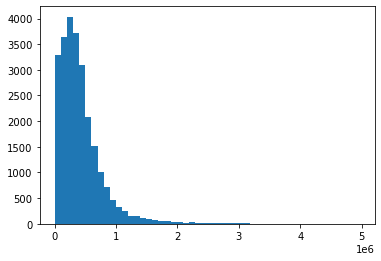

In [18]:
plt.hist(y_train, bins = 50)

In [19]:
list(train.columns)

['square_feet',
 'bedrooms',
 'bathrooms',
 'fips',
 'lot_size',
 'tax_value',
 'house_age']

array([[<AxesSubplot:title={'center':'square_feet'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'fips'}>,
        <AxesSubplot:title={'center':'lot_size'}>,
        <AxesSubplot:title={'center':'tax_value'}>],
       [<AxesSubplot:title={'center':'house_age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

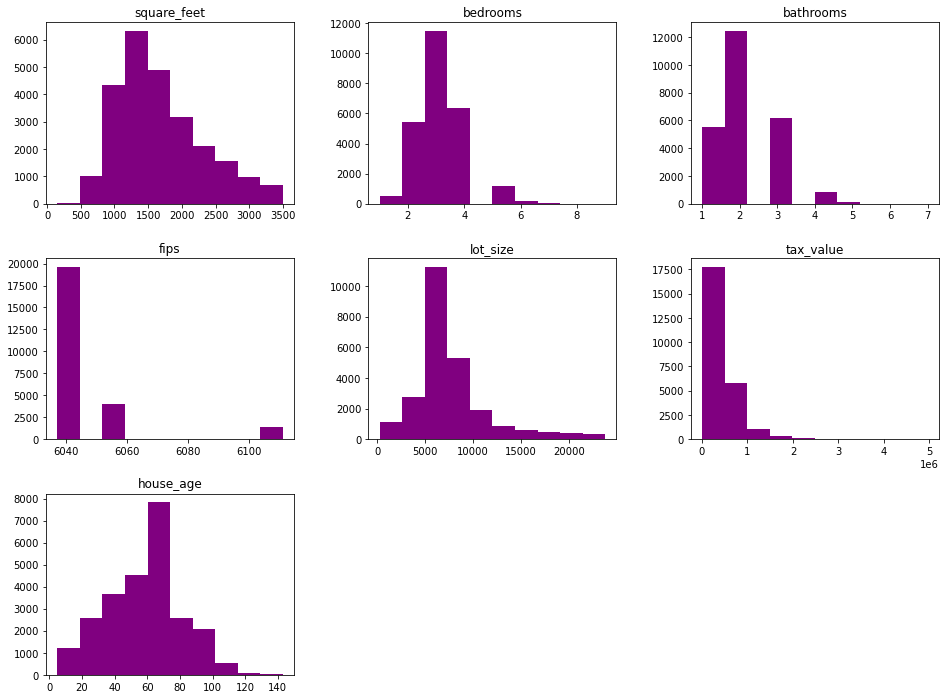

In [20]:
train.hist(grid=False, figsize=(16,12), color='purple')

In [21]:
## takeaways

### most variables appear to have normal distribution

### county may not be a good indicator 

### tax value may still be suffering from outliers 

<AxesSubplot:>

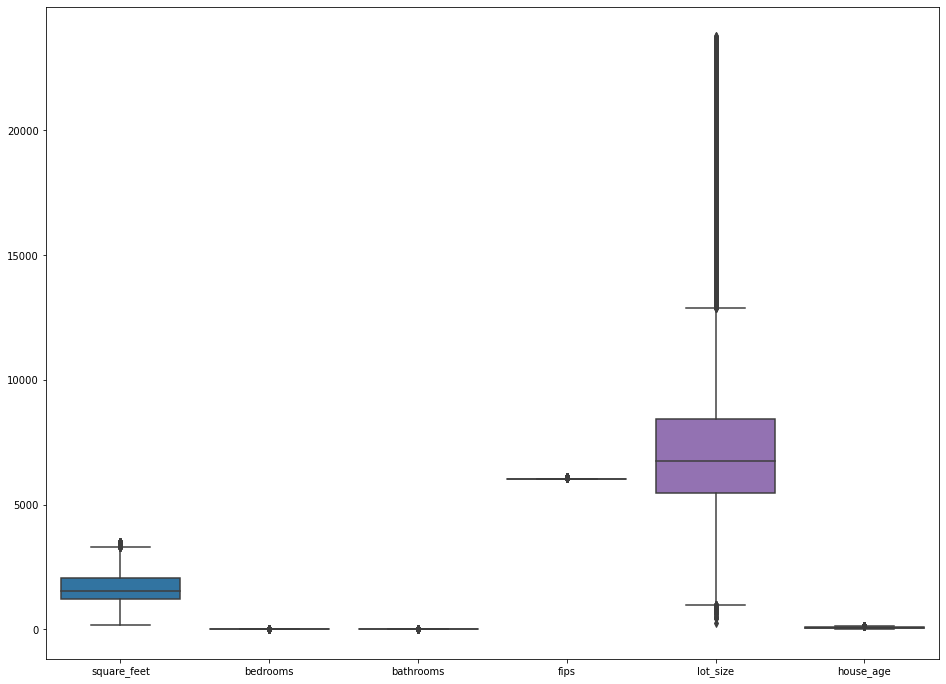

In [22]:
plt.figure(figsize=(16,12))
sns.boxplot(data = train.drop(columns = 'tax_value'))

In [23]:
# .corr() is linear correlation coefficient
corr = train.corr()

corr

,square_feet,bedrooms,bathrooms,fips,lot_size,tax_value,house_age
square_feet,1.000000,0.641993,0.741530,0.112420,0.234175,0.437276,-0.403496
bedrooms,0.641993,1.000000,0.540908,0.115885,0.069036,0.163909,-0.266904
bathrooms,0.741530,0.540908,1.000000,0.019932,0.229504,0.366002,-0.493242
fips,0.112420,0.115885,0.019932,1.000000,-0.090358,0.034542,-0.226257
lot_size,0.234175,0.069036,0.229504,-0.090358,1.000000,0.111031,-0.115184
tax_value,0.437276,0.163909,0.366002,0.034542,0.111031,1.000000,-0.109494
house_age,-0.403496,-0.266904,-0.493242,-0.226257,-0.115184,-0.109494,1.000000


<AxesSubplot:>

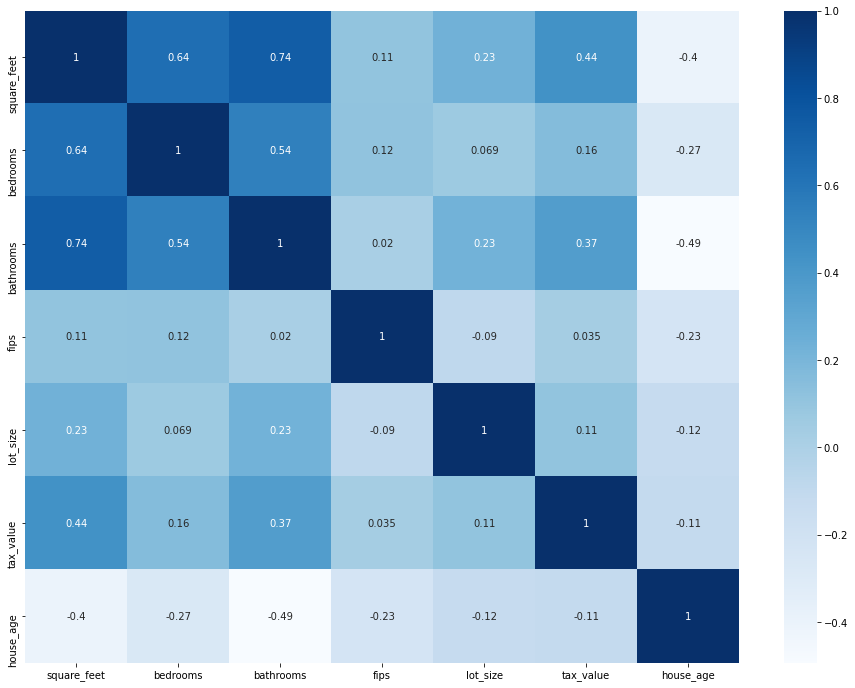

In [24]:
plt.figure(figsize=(16,12))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [25]:
## bedrooms and bathrooms are strongly correlated, they may not both be necessary 

## taxes and tax amount are very strongly correlated

## fips does not appear to have a very strong correlation

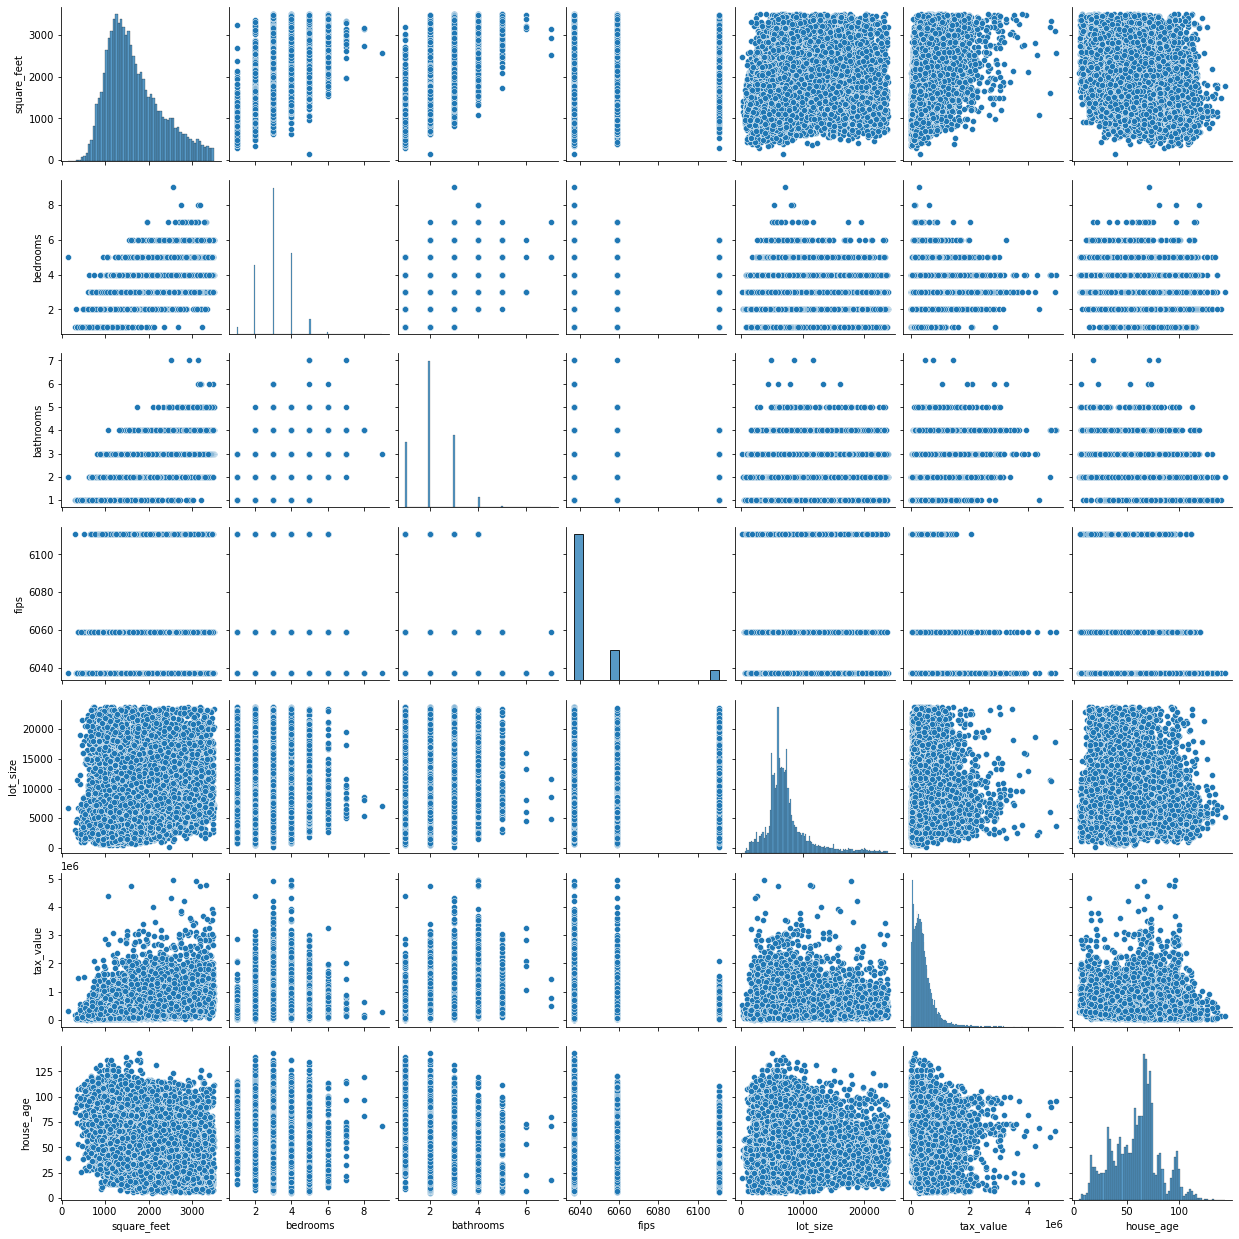

In [26]:
sns.pairplot(data = train)

In [27]:
def plot_variable_pairs_regline(train, hue=None):
    '''
    This function takes in a df and default hue=None and displays a pairplot
    with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 
              'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train, hue=hue, kind="reg", plot_kws={'line_kws':{'color':'red'}, 
                                                    'scatter_kws': {'alpha': 0.1}})

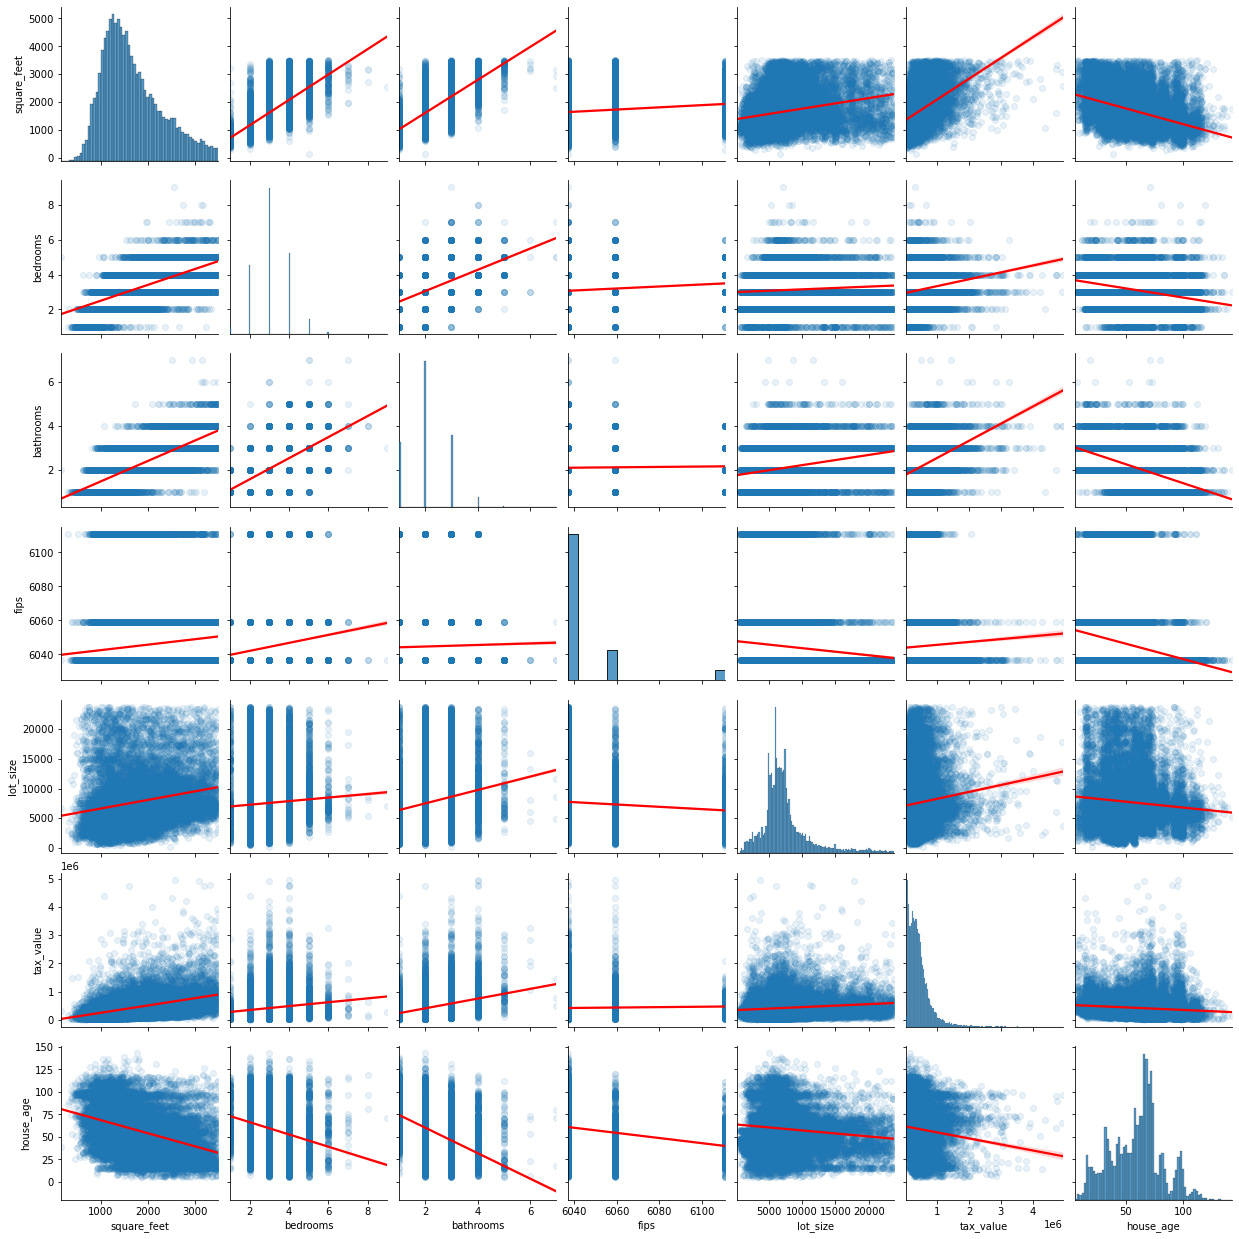

In [28]:
plot_variable_pairs_regline(train)

In [29]:
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    df.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.54


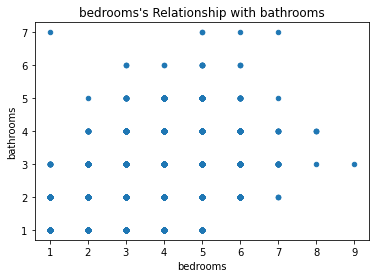

In [30]:
correlation_exploration(train, 'bedrooms', 'bathrooms')

In [31]:
import explore

In [32]:
list(train.columns)

['square_feet',
 'bedrooms',
 'bathrooms',
 'fips',
 'lot_size',
 'tax_value',
 'house_age']

In [33]:
target = ['tax_value']

cat_vars = ['bedrooms', 'bathrooms', 'fips', 'house_age']

quant_vars = ['square_feet', 'lot_size', 'tax_value']

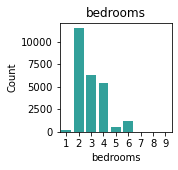

   bedrooms  Count  Percent
3         2  11474    45.75
4         3   6329    25.24
2         4   5410    21.57
5         6   1185     4.73
1         5    507     2.02
6         1    151     0.60
7         7     19     0.08
8         8      3     0.01
9         9      1     0.00
_________________________________________________________________


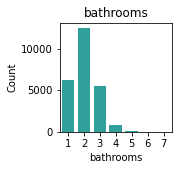

   bathrooms  Count  Percent
2          2  12445    49.62
3          1   6172    24.61
1          3   5524    22.03
4          4    828     3.30
5          5    102     0.41
6          7      5     0.02
7          6      3     0.01
_________________________________________________________________


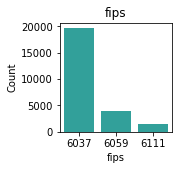

      fips  Count  Percent
6037  6037  19649    78.35
6059  6059   4017    16.02
6111  6111   1413     5.63
_________________________________________________________________


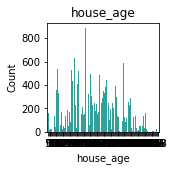

     house_age  Count  Percent
66          48    885     3.53
71          65    834     3.33
67          82    748     2.98
68          58    732     2.92
65          73    657     2.62
..         ...    ...      ...
133          5      2     0.01
139        123      1     0.00
124        139      1     0.00
5          125      1     0.00
143        143      1     0.00

[128 rows x 3 columns]
_________________________________________________________________


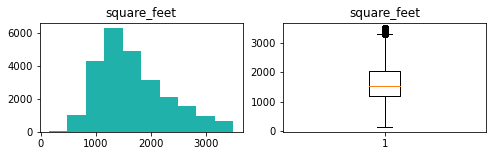

count    25079.000000
mean      1675.181546
std        632.358862
min        152.000000
25%       1207.000000
50%       1541.000000
75%       2047.500000
max       3499.000000
Name: square_feet, dtype: float64


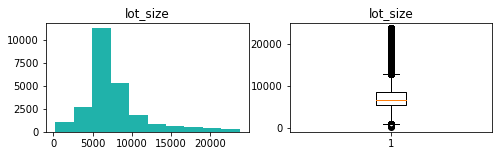

count    25079.000000
mean      7610.571793
std       3898.848592
min        236.000000
25%       5449.000000
50%       6728.000000
75%       8424.500000
max      23772.000000
Name: lot_size, dtype: float64


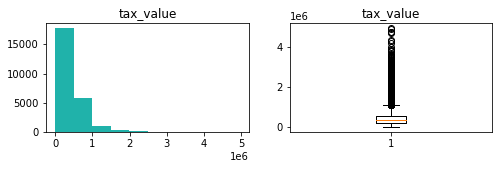

count    2.507900e+04
mean     4.243269e+05
std      3.737917e+05
min      3.254000e+03
25%      1.840690e+05
50%      3.421680e+05
75%      5.436545e+05
max      4.961367e+06
Name: tax_value, dtype: float64


In [34]:
explore.explore_univariate(train, cat_vars, quant_vars)

In [35]:
## most houses have 4 bedrooms, 2 baths

## majority of houses in county 3101

# T Test

In [36]:
H0 = 'There is no difference in tax value between homes with 2 bedrooms and the general population'

H1 = 'There is a difference in the tax value between homes with 2 bedrooms and the general population'

alpha = .05

In [37]:
two_rooms = df[df.bedrooms == 2]



In [38]:
two_rooms.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,tax_value,house_age
parcelid,,,,,,,
12069064,738.0,2,1,6037,4214.0,218552.0,99
11830315,1146.0,2,1,6037,4657.0,273745.0,82
11706737,1316.0,2,1,6037,5091.0,171838.0,113
11737342,1529.0,2,2,6037,3640.0,657099.0,93
12105191,829.0,2,2,6037,16378.0,276147.0,30


In [39]:
μ = df.tax_value.mean()

μ 

422624.796472033

In [40]:
xbar = two_rooms.tax_value.mean()

xbar

353004.0720383094

In [41]:
s = two_rooms.tax_value.std()

s

301308.74072979233

In [42]:
n = two_rooms.shape[0]

n

9606

In [43]:
degf = n - 1

degf

9605

In [44]:
standard_error = s / sqrt(n)

standard_error

3074.258901775528

In [45]:
t = (xbar - μ) / (s / sqrt(n))
t

-22.64634393463556

In [46]:
p = stats.t(degf).sf(t) * 2
p

2.0

In [47]:
print(f't = {t:.5f}')
print(f'p = {p:.5f}')

if p < alpha:
    print(H1)
else:
    print(H0)

t = -22.64634
p = 2.00000
There is no difference in tax value between homes with 2 bedrooms and the general population


In [48]:
H0 = 'There is no difference in tax value between homes in county 3101 and the general population'

H1 = 'There is a difference in the tax value between homes in county 3101 and the general population'

alpha = .05

In [51]:
fips_6037 = df[df.fips == 6037]

μ = df.tax_value.mean()
xbar = fips_6037.tax_value.mean()
s = fips_6037.tax_value.std()
n = fips_6037.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))
t

-7.459805778570219

In [52]:
p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')

if p < alpha:
    print(H1)
else:
    print(H0)

t = -7.45981
p = 2.00000
There is no difference in tax value between homes in county 3101 and the general population


# Correlation

In [53]:
H0 = 'There is no correlation between square feet and tax value'

H1 = 'There is a correlation between square feet and tax value'

alpha = .05

In [54]:
r, p = stats.pearsonr(df.square_feet, df.tax_value)
print(f'r = {r:.5f}')
print(f'p = {p:.1f}')

if p < alpha:
    print(H1)
else:
    print(H0)

r = 0.43939
p = 0.0
There is a correlation between square feet and tax value


In [55]:
H0 = 'There is no correlation between lot size and tax value'

H1 = 'There is a correlation between lot size and tax value'

alpha = .05

In [56]:
r, p = stats.pearsonr(df.lot_size, df.tax_value)
print(f'r = {r:.5f}')
print(f'p = {p:.1f}')

if p < alpha:
    print(H1)
else:
    print(H0)

r = 0.11156
p = 0.0
There is a correlation between lot size and tax value
